In [1]:
import numpy as np
import os
import tensorflow as tf
import cv2
import json
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models


print("Hello world.")

2025-12-18 15:16:17.277241: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766070977.670081      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766070977.780047      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1766070978.863651      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766070978.863688      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766070978.863690      55 computation_placer.cc:177] computation placer alr

Hello world.


In [2]:
import os
import json
import numpy as np
import cv2
import random
import pandas as pd

def create_mask(json_file, image_shape):
    if json_file is None or not os.path.exists(json_file):
        return None
    try:
        with open(json_file, 'r') as f:
            data = json.load(f)
    except:
        return None
    if 'shapes' not in data or data['shapes'] is None:
        return None

    mask = np.zeros(image_shape[:2], dtype=np.uint8)

    try:
        for shape in data['shapes']:
            points = np.array(shape.get('points', []), dtype=np.int32)
            if len(points) > 2:
                cv2.fillPoly(mask, [points], 255)
    except:
        return None

    return mask


def find_image_file(base_name, image_path):
    """Find the correct image file (.jpg, .JPG, .jpeg, .JPEG, .png)"""
    exts = [".jpg", ".JPG", ".jpeg", ".JPEG", ".png"]
    for ext in exts:
        file_path = os.path.join(image_path, base_name + ext)
        if os.path.exists(file_path):
            return file_path
    return None

print("Hello world")

Hello world


In [3]:
train_images, valid_images, test_images  = [], [], []
train_masks, valid_masks, test_masks = [], [] , []
test_images_a, test_images_b, test_images_d = [], [], []
test_masks_a, test_masks_b, test_masks_d = [], [], []

image_path = "/kaggle/input/malabar-dataset/Malabar_Dataset_Original_Data/Malabar_Dataset/Anthracnose(102)"
json_path = "/kaggle/input/annotated-dataset-json-files-version-2/annotated_json_files/Anthracnose(102)/affected_region"
split_file = pd.read_csv("/kaggle/input/malabar-dataset/anthracnose_split.csv")


for i in range(0, len(split_file)):
    used_for = split_file.iloc[i]["used_for"]
    image_no = split_file.iloc[i]["image_no"]
    base_name = f"Anthracnose ({image_no})"

    json_file = os.path.join(json_path, base_name + ".json")

    # --- FIND REAL IMAGE FILE ---
    image_file = find_image_file(base_name, image_path)
    if image_file is None:
        print(f"Image missing: {base_name}")
        continue

    image = cv2.imread(image_file)
    if image is None:
        print(f"Failed to read: {image_file}")
        continue

    mask = create_mask(json_file, image.shape)
    if mask is None:
        print(f"Mask skipped: {json_file}")
        continue

    if used_for == "training":
        train_images.append(image)
        train_masks.append(mask)
    elif used_for == "validation":
        valid_images.append(image)
        valid_masks.append(mask)
    else:
        test_images.append(image)
        test_masks.append(mask)
        test_images_a.append(image)
        test_masks_a.append(mask)



print(len(train_images), len(train_masks))
print(len(valid_images), len(valid_masks))
print(len(test_images), len(test_masks))

80 80
10 10
12 12


In [4]:
image_path = "/kaggle/input/malabar-dataset/Malabar_Dataset_Original_Data/Malabar_Dataset/Bacterial-Spot(752)"
json_path = "/kaggle/input/annotated-dataset-json-files-version-2/annotated_json_files/Bacterial-Spot(752)/affected_region/Bacterial-Spot(752)"
split_file = pd.read_csv("/kaggle/input/malabar-dataset/bacterial_spot_split.csv")


for i in range(0, len(split_file)):
    used_for = split_file.iloc[i]["used_for"]
    image_no = split_file.iloc[i]["image_no"]
    base_name = f"Bacterial-Spot ({image_no})"

    json_file = os.path.join(json_path, base_name + ".json")

    # --- FIND REAL IMAGE FILE ---
    image_file = find_image_file(base_name, image_path)
    if image_file is None:
        print(f"Image missing: {base_name}")
        continue

    image = cv2.imread(image_file)
    if image is None:
        print(f"Failed to read: {image_file}")
        continue

    mask = create_mask(json_file, image.shape)
    if mask is None:
        print(f"Mask skipped: {json_file}")
        continue

    if used_for == "training":
        train_images.append(image)
        train_masks.append(mask)
    elif used_for == "validation":
        valid_images.append(image)
        valid_masks.append(mask)
    else:
        test_images.append(image)
        test_masks.append(mask)
        test_images_a.append(image)
        test_masks_a.append(mask)


#Bacterial-Spot (1).jpg

print(len(train_images), len(train_masks))
print(len(valid_images), len(valid_masks))
print(len(test_images), len(test_masks))

680 680
85 85
89 89


In [5]:
image_path = "/kaggle/input/malabar-dataset/Malabar_Dataset_Original_Data/Malabar_Dataset/Downy-Mildew(240)"
json_path = "/kaggle/input/annotated-dataset-json-files-version-2/annotated_json_files/Downy-Mildew(240)/affected_region"
split_file = pd.read_csv("/kaggle/input/malabar-dataset/downy_mildew_split.csv")


for i in range(0, len(split_file)):
    used_for = split_file.iloc[i]["used_for"]
    image_no = split_file.iloc[i]["image_no"]
    base_name = f"Downy-Mildew ({image_no})"

    json_file = os.path.join(json_path, base_name + ".json")

    # --- FIND REAL IMAGE FILE ---
    image_file = find_image_file(base_name, image_path)
    if image_file is None:
        print(f"Image missing: {base_name}")
        continue

    image = cv2.imread(image_file)
    if image is None:
        print(f"Failed to read: {image_file}")
        continue

    mask = create_mask(json_file, image.shape)
    if mask is None:
        print(f"Mask skipped: {json_file}")
        continue

    if used_for == "training":
        train_images.append(image)
        train_masks.append(mask)
    elif used_for == "validation":
        valid_images.append(image)
        valid_masks.append(mask)
    else:
        test_images.append(image)
        test_masks.append(mask)
        test_images_a.append(image)
        test_masks_a.append(mask)


#Bacterial-Spot (1).jpg

print(len(train_images), len(train_masks))
print(len(valid_images), len(valid_masks))
print(len(test_images), len(test_masks))

872 872
109 109
113 113


In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

# -----------------------------------------
# Convolution Block with BatchNorm + ReLU
# -----------------------------------------
def conv_block(x, filters, kernel_size=3, dilation_rate=1, stride=1):
    x = layers.Conv2D(filters, kernel_size, strides=stride, padding="same",
                      dilation_rate=dilation_rate, kernel_initializer="he_normal")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    return x

# -----------------------------------------
# ResNet-like Backbone with Downsampling
# -----------------------------------------
def resnet_block(x, filters, n_blocks, downsample=False):
    for i in range(n_blocks):
        shortcut = x
        stride = 2 if (i == 0 and downsample) else 1  # downsample first block if needed
        x = conv_block(x, filters, kernel_size=3, stride=stride)
        x = conv_block(x, filters, kernel_size=3)
        if shortcut.shape[-1] != x.shape[-1] or stride == 2:
            shortcut = layers.Conv2D(filters, 1, strides=stride, padding="same")(shortcut)
        x = layers.Add()([x, shortcut])
        x = layers.Activation("relu")(x)
    return x

# -----------------------------------------
# Atrous Spatial Pyramid Pooling (ASPP)
# -----------------------------------------
def ASPP(x, filters):
    conv1 = conv_block(x, filters, kernel_size=1)
    conv6 = conv_block(x, filters, kernel_size=3, dilation_rate=6)
    conv12 = conv_block(x, filters, kernel_size=3, dilation_rate=12)
    conv18 = conv_block(x, filters, kernel_size=3, dilation_rate=18)
    
    pooled = layers.GlobalAveragePooling2D()(x)
    pooled = layers.Reshape((1, 1, x.shape[-1]))(pooled)
    pooled = conv_block(pooled, filters, kernel_size=1)
    pooled = layers.UpSampling2D(size=(x.shape[1], x.shape[2]), interpolation='bilinear')(pooled)
    
    x = layers.Concatenate()([conv1, conv6, conv12, conv18, pooled])
    x = conv_block(x, filters, kernel_size=1)
    return x

# -----------------------------------------
# Build DeepLabV3 with safe memory usage
# -----------------------------------------
def build_deeplabv3(input_shape=(256, 256, 3), num_classes=1):
    inputs = layers.Input(shape=input_shape)
    
    # Initial conv
    x = conv_block(inputs, 64)
    
    # Backbone with downsampling
    x = resnet_block(x, 64, n_blocks=2)
    x = resnet_block(x, 128, n_blocks=2, downsample=True)  # reduce 256->128
    x = resnet_block(x, 256, n_blocks=2, downsample=True)  # reduce 128->64
    x = resnet_block(x, 512, n_blocks=2, downsample=True)  # reduce 64->32
    
    # ASPP
    x = ASPP(x, 256)
    
    # Upsample to match input size
    x = layers.Resizing(input_shape[0], input_shape[1], interpolation='bilinear')(x)
    
    # Final conv
    x = conv_block(x, 256)
    x = layers.Conv2D(num_classes, 1, activation='sigmoid' if num_classes==1 else 'softmax')(x)
    
    model = models.Model(inputs, x, name="DeepLabV3_Safe")
    return model

# -----------------------------------------
# Build and summarize
# -----------------------------------------
model = build_deeplabv3(input_shape=(256, 256, 3), num_classes=1)
model.summary()


I0000 00:00:1766071060.071309      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1766071060.075284      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "DeepLabV3_Safe"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256, 256,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ activation[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 256, 256,  │     36,928 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        256 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 256, 256,  │          0 │ activation_2[0][… │
│                     │ 64)               │            │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 256, 256,  │          0 │ add[0][0]         │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 256, 256,  │     36,928 │ activation_3[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        256 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 256, 256,  │     36,928 │ activation_4[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        256 │ conv2d_4[0][0]  

 Total params: 15,907,457 (60.68 MB)

 Trainable params: 15,896,065 (60.64 MB)

 Non-trainable params: 11,392 (44.50 KB)

In [7]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [8]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np

# Preprocess images and masks
image_size = (256, 256)

def preprocess_data(images, masks):
    images_resized = [cv2.resize(img, image_size) for img in images]
    masks_resized = [cv2.resize(mask, image_size) for mask in masks]
    
    images_array = np.array(images_resized) / 255.0
    masks_array = np.array(masks_resized) / 255.0
    
    images_array = images_array.astype(np.float32)
    masks_array = masks_array.astype(np.float32)
    
    masks_array = np.expand_dims(masks_array, axis=-1)  # Ensure correct shape
    
    return images_array, masks_array

# Prepare datasets
X_train, y_train = preprocess_data(train_images, train_masks)
X_valid, y_valid = preprocess_data(valid_images, valid_masks)
X_test, y_test = preprocess_data(test_images, test_masks)
#X_test_a, y_test_a = preprocess_data(test_images_a, test_masks_a)
#X_test_b, y_test_b = preprocess_data(test_images_b, test_masks_b)

# Callbacks
checkpoint = ModelCheckpoint("deeplabV3_semi_final_best_model.keras", monitor="val_accuracy", save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor="val_accuracy", patience=40, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs= 50,
    batch_size=8,
    callbacks=[checkpoint, early_stopping]
)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Epoch 1/50


I0000 00:00:1766071079.273735     123 service.cc:152] XLA service 0x78d2ac0147d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1766071079.273772     123 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1766071079.273778     123 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1766071081.953414     123 cuda_dnn.cc:529] Loaded cuDNN version 91002
2025-12-18 15:18:32.441377: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng4{} for conv %cudnn-conv.66 = (f32[512,2592,4,4]{3,2,1,0}, u8[0]{0}) custom-call(f32[512,256,3,3]{3,2,1,0} %bitcast.22819, f32[2592,256,2,2]{3,2,1,0} %bitcast.24126), window={size=2x2 pad=1_1x1_1 rhs_reversal=1x1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convForward", metadata={op_type="Conv2DBackpropInput" op_name="gradient_tape/DeepLabV3_Safe_1/conv2d_23_1/convolution/Conv2DBackpropInput

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 883ms/step - accuracy: 0.9075 - loss: 0.2912

2025-12-18 15:20:57.640596: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 15:20:57.940997: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.



Epoch 1: val_accuracy improved from -inf to 0.99214, saving model to deeplabV3_semi_final_best_model.keras
109/109 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.9081 - loss: 0.2899 - val_accuracy: 0.9921 - val_loss: 0.1029
Epoch 2/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 881ms/step - accuracy: 0.9917 - loss: 0.0469
Epoch 2: val_accuracy improved from 0.99214 to 0.99215, saving model to deeplabV3_semi_final_best_model.keras
109/109 ━━━━━━━━━━━━━━━━━━━━ 102s 932ms/step - accuracy: 0.9917 - loss: 0.0468 - val_accuracy: 0.9921 - val_loss: 0.0501
Epoch 3/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 880ms/step - accuracy: 0.9920 - loss: 0.0361
Epoch 3: val_accuracy did not improve from 0.99215
109/109 ━━━━━━━━━━━━━━━━━━━━ 100s 921ms/step - accuracy: 0.9920 - loss: 0.0361 - val_accuracy: 0.9882 - val_loss: 0.0582
Epoch 4/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 880ms/step - accuracy: 0.9932 - loss: 0.0277
Epoch 4: val_accuracy did not improve from 0.99215
109/109 ━━━━━━━━━━━━━━━━━━━━ 100s 920ms/step - accuracy:

2025-12-18 16:43:54.750854: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng18{k11=0} for conv %cudnn-conv-bw-filter.1 = (f32[256,10368,2,2]{3,2,1,0}, u8[0]{0}) custom-call(f32[512,10368,4,4]{3,2,1,0} %bitcast.3851, f32[512,256,3,3]{3,2,1,0} %bitcast.3858), window={size=2x2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", metadata={op_type="Conv2D" op_name="DeepLabV3_Safe_1/conv2d_23_1/convolution" source_file="/usr/local/lib/python3.12/dist-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false} is taking a while...
2025-12-18 16:43:55.682695: E external/local_xla/xla/service/slow_operation_alarm.cc:140] The operation took 1.932080128s
Trying algorithm eng18{k11=0} for conv %cudnn-conv-bw-filter.

3/4 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9936 - loss: 0.0214  

2025-12-18 16:44:39.996265: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 16:44:40.312000: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 16:44:47.502568: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng4{} for conv %cudnn-conv.53 = (f32[2448,256,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[2448,512,5,5]{3,2,1,0} %bitcast.3796, f32[256,512,3,3]{3,2,1,0} %bitcast.3803), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convForward", metadata={op_type="Conv2D" op_name="DeepLabV3_Safe_1/conv2d_22_1/convolution" source_file="/usr/local/lib/python3.12/dist-packages/tensorflow/python/framework/ops.py" 

4/4 ━━━━━━━━━━━━━━━━━━━━ 104s 14s/step - accuracy: 0.9941 - loss: 0.0198
Test Loss: 0.0174, Test Accuracy: 0.9947


4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step


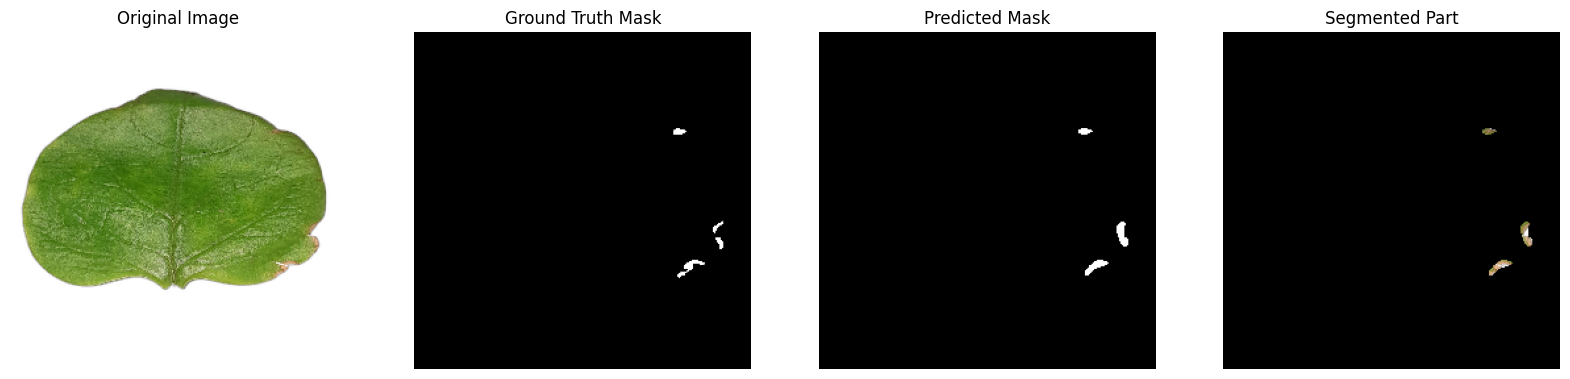

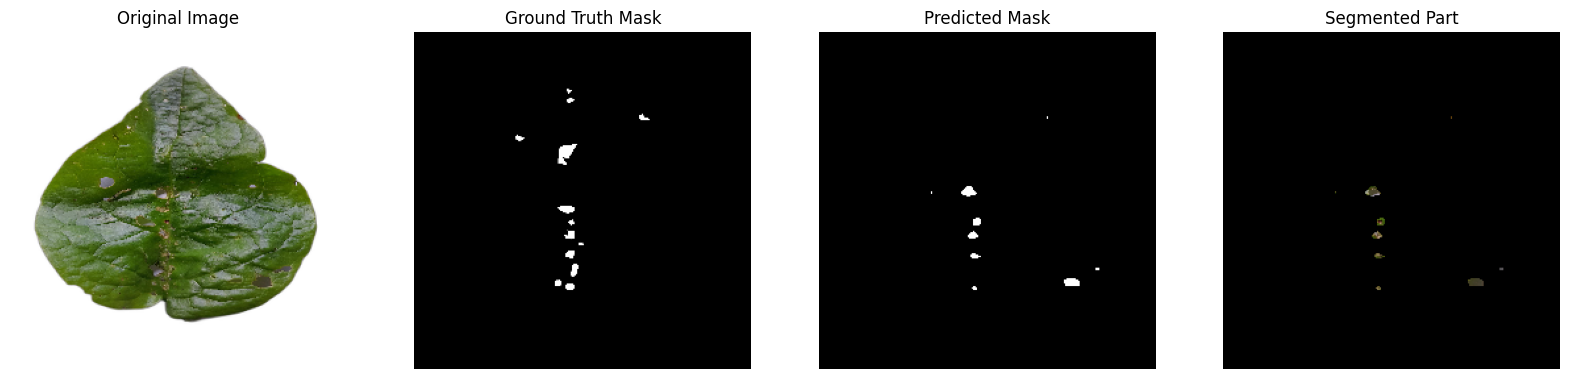

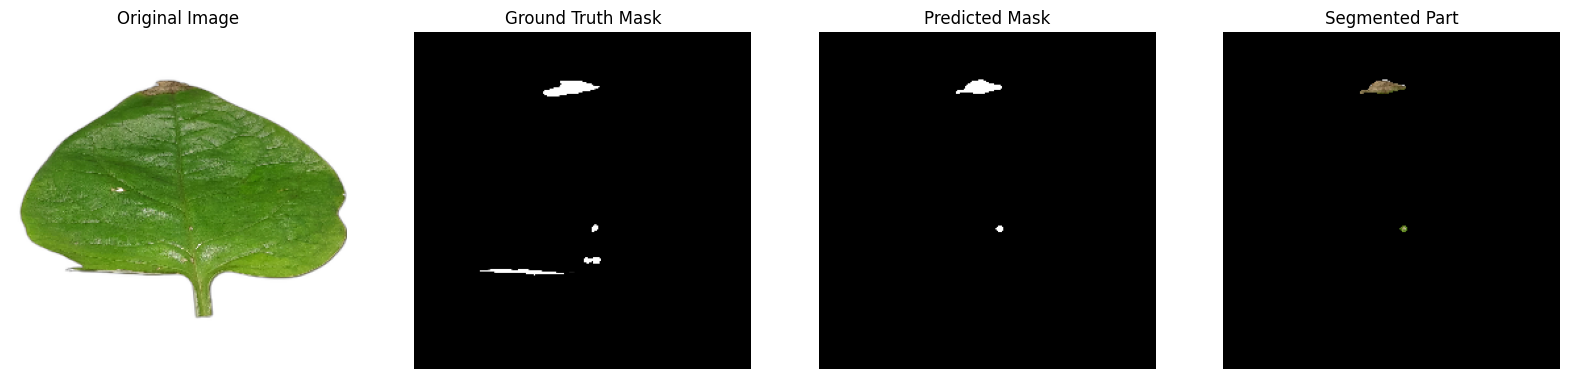

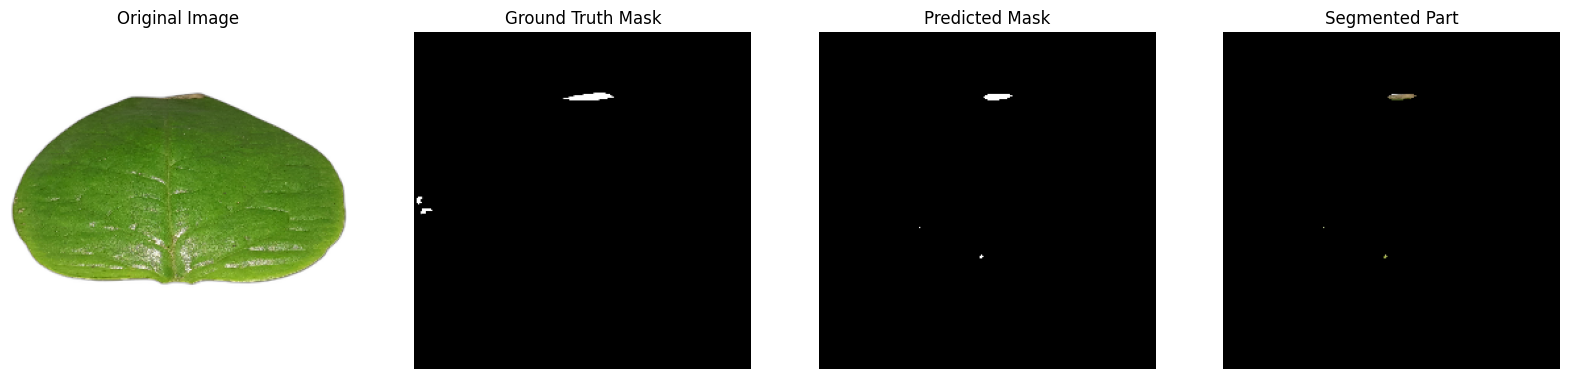

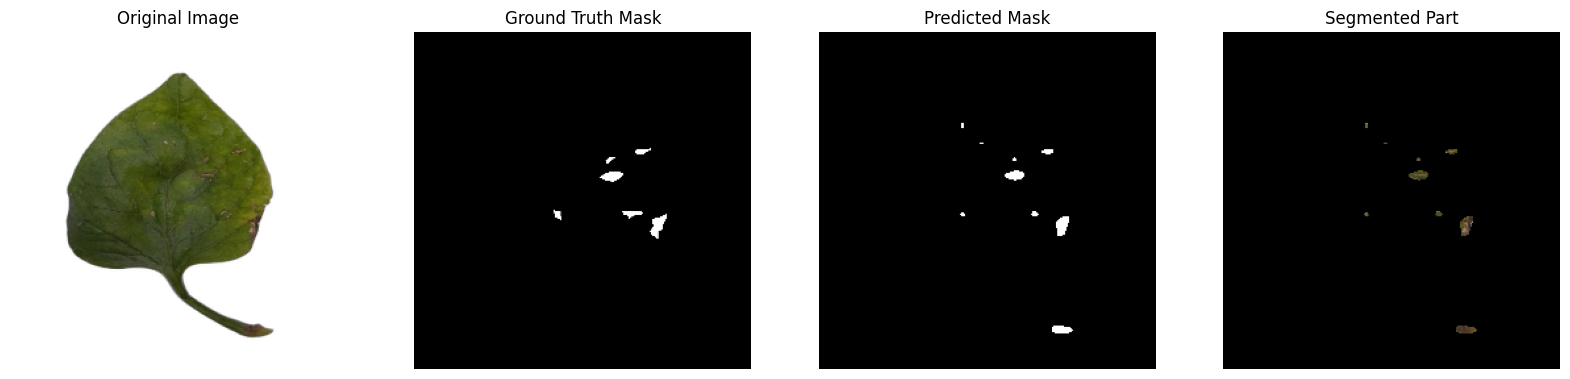

In [9]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

# Prediction and Mask Creation
def create_mask(predictions):
    # Convert predictions to binary mask
    predictions = (predictions > 0.5).astype(np.uint8)
    return predictions

# Load model and predict
best_model = load_model("/kaggle/working/deeplabV3_semi_final_best_model.keras")
predictions = best_model.predict(X_test)

# Create masks from predictions
predicted_masks = create_mask(predictions)

def get_segmented_image(image, mask):
    # Ensure both are uint8 and mask is single channel
    image_uint8 = (image * 255).astype(np.uint8) if image.dtype != np.uint8 else image
    mask_uint8 = (mask.squeeze() * 255).astype(np.uint8)
    
    # Ensure mask is 2D
    if mask_uint8.ndim == 3:
        mask_uint8 = mask_uint8[..., 0]

    # Apply mask using bitwise_and
    segmented = cv2.bitwise_and(image_uint8, image_uint8, mask=mask_uint8)
    return segmented

def visualize_results(images, masks, predictions, num_images=10):
    for i in range(0, num_images):
        img = images[i]
        true_mask = masks[i]
        predicted_mask = predictions[i]
        segmented_img = get_segmented_image(img, predicted_mask)

        plt.figure(figsize=(20, 5))  # wider figure for 4 plots

        # 1. Original Image
        plt.subplot(1, 4, 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        # 2. Ground Truth Mask
        plt.subplot(1, 4, 2)
        plt.imshow(true_mask.squeeze(), cmap='gray')
        plt.title('Ground Truth Mask')
        plt.axis('off')

        # 3. Predicted Mask
        plt.subplot(1, 4, 3)
        plt.imshow(predicted_mask.squeeze(), cmap='gray')
        plt.title('Predicted Mask')
        plt.axis('off')

        # 4. Segmented Part
        plt.subplot(1, 4, 4)
        plt.imshow(cv2.cvtColor(segmented_img, cv2.COLOR_BGR2RGB))
        plt.title('Segmented Part')
        plt.axis('off')

        plt.show()

# Visualize results
visualize_results(X_test, y_test, predicted_masks, num_images=5)

In [ ]:
while(True):
    a = 5